In [5]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import sklearn
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn import svm
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import LogisticRegression,LinearRegression
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# %matplotlib inline 
# pd.set_option('display.max_rows', None)

In [4]:
# admit = pd.read_csv('C:\data_file\graduate_admissions\Admission_Predict.csv', index_col = 0, names = ['GRE','TOEFL','UniRating','SOP','LOR','CGPA','Research','Chance_of_Admission'], header = 0)
# admit.head()


### specify file location

In [3]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
GRE                    400 non-null int64
TOEFL                  400 non-null int64
UniRating              400 non-null int64
SOP                    400 non-null float64
LOR                    400 non-null float64
CGPA                   400 non-null float64
Research               400 non-null int64
Chance_of_Admission    400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [4]:
admit.isnull().sum()

GRE                    0
TOEFL                  0
UniRating              0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

In [5]:
admit['Chance_of_Admission'] = admit['Chance_of_Admission'] *100

In [6]:
bins = (2, 65, 100)
group_names = ['no', 'yes']
admit['Chance_of_Admission'] = pd.cut(admit['Chance_of_Admission'], bins = bins , labels = group_names)
admit['Chance_of_Admission'].unique()

[yes, no]
Categories (2, object): [no < yes]

In [7]:
label_encoder = LabelEncoder()

In [8]:
admit['Chance_of_Admission'] = label_encoder.fit_transform(admit['Chance_of_Admission'])

In [9]:
admit.head(10)

,GRE,TOEFL,UniRating,SOP,LOR,CGPA,Research,Chance_of_Admission
1,337,118,4,4.5,4.5,9.65,1,1
2,324,107,4,4.0,4.5,8.87,1,1
3,316,104,3,3.0,3.5,8.00,1,1
4,322,110,3,3.5,2.5,8.67,1,1
5,314,103,2,2.0,3.0,8.21,0,0
6,330,115,5,4.5,3.0,9.34,1,1
7,321,109,3,3.0,4.0,8.20,1,1
8,308,101,2,3.0,4.0,7.90,0,1
9,302,102,1,2.0,1.5,8.00,0,0
10,323,108,3,3.5,3.0,8.60,0,0


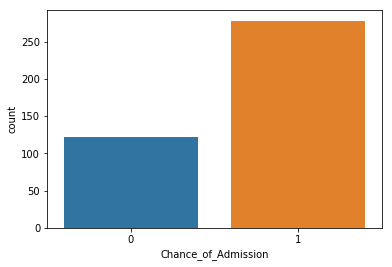

In [10]:
sns.countplot(admit['Chance_of_Admission'])  # include plot title

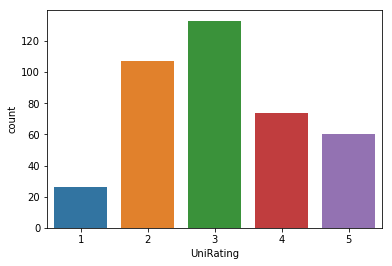

In [11]:
sns.countplot(admit['UniRating'])

In [12]:
X = admit.drop('Chance_of_Admission', axis = 1)
y = admit['Chance_of_Admission']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Agora\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Agora\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Agora\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
lr = LogisticRegression()

In [16]:
lr.fit(X_train, y_train) 

C:\Users\Agora\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [18]:
accuracy_score(y_test, y_pred)


0.86

In [19]:
classification_report(y_test, y_pred) # displayed better when printed

'              precision    recall  f1-score   support\n\n           0       0.83      0.73      0.77        33\n           1       0.87      0.93      0.90        67\n\n   micro avg       0.86      0.86      0.86       100\n   macro avg       0.85      0.83      0.84       100\nweighted avg       0.86      0.86      0.86       100\n'

In [20]:
confusion_matrix(y_test, y_pred)

array([[24,  9],
       [ 5, 62]], dtype=int64)

# Testing the Model

In [21]:
Xnew = [[280,92,2,4.5,4.0,7.50,0]]
Xnew = sc.transform(Xnew)
ynew = lr.predict(Xnew)
ynew

array([0])

In [22]:
X2 = [[323,120,3.5,4.5,4.0,8.50,1]]
X2 = sc.transform(X2)
y2 = lr.predict(X2)
y2

array([1])

In [23]:
idowu= [[311,88,3.5,4.5,4.5,8.7,1]]
idowu = sc.transform(idowu)
y_id = lr.predict(idowu)
y_id

array([1])

In [24]:
admit.head()

,GRE,TOEFL,UniRating,SOP,LOR,CGPA,Research,Chance_of_Admission
1,337,118,4,4.5,4.5,9.65,1,1
2,324,107,4,4.0,4.5,8.87,1,1
3,316,104,3,3.0,3.5,8.00,1,1
4,322,110,3,3.5,2.5,8.67,1,1
5,314,103,2,2.0,3.0,8.21,0,0


In [25]:
# data sorting 
admit.sort_values('GRE', ascending = 'FALSE').head()

,GRE,TOEFL,UniRating,SOP,LOR,CGPA,Research,Chance_of_Admission
118,290,104,4,2.0,2.5,7.46,0,0
378,290,100,1,1.5,2.0,7.56,0,0
169,293,97,2,2.0,4.0,7.80,1,0
273,294,95,1,1.5,1.5,7.64,0,0
80,294,93,1,1.5,2.0,7.36,0,0


In [26]:
admit.TOEFL.sort_values().head()

369    92
80     93
29     93
348    94
273    95
Name: TOEFL, dtype: int64

In [27]:
# data filtering 
admit[admit.GRE == 300]

,GRE,TOEFL,UniRating,SOP,LOR,CGPA,Research,Chance_of_Admission
31,300,97,2,3.0,3.0,8.10,1,0
38,300,105,1,1.0,2.0,7.80,0,0
59,300,99,1,3.0,2.0,6.80,1,0
126,300,100,3,2.0,3.0,8.66,1,0
181,300,104,3,3.5,3.0,8.16,0,1
292,300,102,2,1.5,2.0,7.87,0,0
318,300,99,1,1.0,2.5,8.01,0,0
354,300,102,3,3.5,2.5,8.17,0,0
384,300,100,3,3.0,3.5,8.26,0,0


In [28]:

df = admit[(admit.GRE == 300) & (admit.TOEFL == 100)] 

In [29]:
df

,GRE,TOEFL,UniRating,SOP,LOR,CGPA,Research,Chance_of_Admission
126,300,100,3,2.0,3.0,8.66,1,0
384,300,100,3,3.0,3.5,8.26,0,0


In [30]:
admit[admit['SOP']== 3.5 ].head()

admit[admit['SOP']== 3.5 ].head()

admit[admit['SOP']== 3.5 ].head()

admit[admit['SOP']== 3.5 ].head()

,GRE,TOEFL,UniRating,SOP,LOR,CGPA,Research,Chance_of_Admission
4,322,110,3,3.5,2.5,8.67,1,1
10,323,108,3,3.5,3.0,8.60,0,0
11,325,106,3,3.5,4.0,8.40,1,0
15,311,104,3,3.5,2.0,8.20,1,0
16,314,105,3,3.5,2.5,8.30,0,0


In [31]:
# filtering  with SOP and Research 
df1 = admit[(admit['SOP']== 3.5)& (admit['Research']== 1)]

In [32]:
df1.head()

,GRE,TOEFL,UniRating,SOP,LOR,CGPA,Research,Chance_of_Admission
4,322,110,3,3.5,2.5,8.67,1,1
11,325,106,3,3.5,4.0,8.40,1,0
15,311,104,3,3.5,2.0,8.20,1,0
41,308,110,3,3.5,3.0,8.00,1,0
49,321,110,3,3.5,5.0,8.85,1,1


In [33]:
# the resultant filtered dataframe above allowed us a third filter of LOR
df2 = df1[(df1['LOR']== 3.0)]

In [34]:
df2.head()

,GRE,TOEFL,UniRating,SOP,LOR,CGPA,Research,Chance_of_Admission
41,308,110,3,3.5,3.0,8.00,1,0
105,326,112,3,3.5,3.0,9.05,1,1
115,311,105,3,3.5,3.0,8.45,1,0
129,326,112,3,3.5,3.0,9.10,1,1
150,311,106,2,3.5,3.0,8.26,1,1


(array([1., 2., 5., 6.]),
 array([ 98.  , 102.25, 106.5 , 110.75, 115.  ]),
 <a list of 4 Patch objects>)

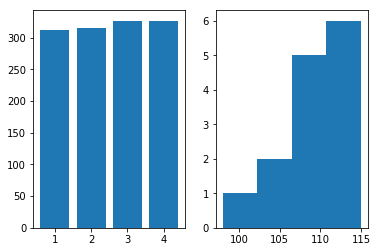

In [35]:
fig, axes = plt.subplots(1,2)
axes[0].bar(df2.UniRating, df2.GRE)
axes[1].hist(df2.TOEFL, bins = 4 )

fig, axes = plt.subplots(1,2)
axes[0].bar(df2.UniRating, df2.GRE)
axes[1].hist(df2.TOEFL, bins = 4 )